<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install pandas==1.3.5

zsh:1: command not found: mamba
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 851.1 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
import yfinance as yf

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Get historical stock data for Tesla with the period set to "max"
tesla_history = tesla_ticker.history(period="max").reset_index()

# Save the historical stock data in a dataframe named tesla_data
tesla_data = pd.DataFrame(tesla_history)

# Print the dataframe
print(tesla_data)


           Date        Open        High         Low       Close     Volume  \
0    2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
1    2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2    2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
3    2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
4    2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...         ...         ...         ...         ...         ...        ...   
3270 2023-06-27  243.240005  250.389999  240.850006  250.210007  164968200   
3271 2023-06-28  249.699997  259.880005  248.889999  256.239990  159770800   
3272 2023-06-29  258.029999  260.739990  253.610001  257.500000  131283400   
3273 2023-06-30  260.600006  264.450012  259.890015  261.769989  112267600   
3274 2023-07-03  276.489990  284.250000  275.109985  279.820007  119685900   

      Dividends  Stock Splits  
0             0           0.0  

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Get historical stock data for Tesla with the period set to "max"
tesla_history = tesla_ticker.history(period="max")

# Save the historical stock data in a dataframe named tesla_data
tesla_data = pd.DataFrame(tesla_history)
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.text

print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup`.


In [10]:
from bs4 import BeautifulSoup

# Assuming you have the html_data variable containing the HTML content
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML using Beautiful Soup
# For example, let's find all the <a> tags in the HTML:
links = soup.find_all('a')

# You can also extract specific elements or attributes from the HTML
# For example, let's extract the title of the webpage:
title = soup.title.text

# Print the extracted information
print("Links:")
for link in links:
    href = link.get('href')  # Get the 'href' attribute, or None if it doesn't exist
    print(href)

print("Title:", title)

Links:
https://www.macrotrends.net
/stocks/stock-screener
/stocks/research
/charts/stock-indexes
/charts/precious-metals
/charts/energy
/charts/commodities
/charts/exchange-rates
/charts/interest-rates
/charts/economy
/countries/topic-overview
https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/financial-statements
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-assets
https://www.macrotrends.net/stocks/charts/TSLA/tesla/profit-margins
https://www.macrotrends.net/stocks/charts/TSLA/tesla/pe-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/current-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/dividend-yield-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/gross-profit
https://www.macrotrends.net/stocks/charts/TSLA/tesla/operating-income
https://www.

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [11]:
from bs4 import BeautifulSoup
import pandas as pd

# Assuming you have the html_data variable containing the HTML content
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing Tesla Quarterly Revenue
table = soup.find('table')

# Extract the table data into a list of lists
data = []
for row in table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    if len(row_data) == 2:
        data.append(row_data)

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Print the DataFrame
print(tesla_revenue)


    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/var/folders/8j/z3wg72qj5176hmxnx37vzyv40000gn/T/ipykernel_49987/349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
import yfinance as yf

ticker_symbol = 'GME'
ticker = yf.Ticker(ticker_symbol)

# You can now use the ticker object to access various stock data
# For example, to get the stock info:
stock_info = ticker.info

# To get the historical stock data:
historical_data = ticker.history(period='1d')


# Print the stock info
print(stock_info)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.

In [19]:
import yfinance as yf
import pandas as pd

ticker_symbol = 'GME'
ticker = yf.Ticker(ticker_symbol)

# Extract stock information for the maximum amount of time
gme_data = ticker.history(period='max')

# Print the DataFrame
print(gme_data)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683251   1.687459   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615921   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-06-27  23.290001  23.600000  23.000000  23.580000   2141500        0.0   
2023-06-28  23.440001  25.100000  23.400000  24.980000   3493900        0.0   
2023-06-29  24.959999  25.469999  24.620001  24.900000   3101000        0.0   
2023-06-30  24.969999  25.129999  24.250000  24.250000   2797500        0.0   
2023-07-03  24.290001  25.110001  24.209999  24.9100

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
import yfinance as yf
import pandas as pd

ticker_symbol = 'GME'
ticker = yf.Ticker(ticker_symbol)

# Extract stock information for the maximum amount of time
gme_data = ticker.history(period='max')

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [22]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)
html_data = response.text

print(html_data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parse the html data using `beautiful_soup`.


In [28]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML using Beautiful Soup
# For example, let's find all the <a> tags in the HTML:
links = soup.find_all('a')

# Print the extracted information
print("Links:")
for link in links:
    print(link.text)

# Extract the title of the webpage:
title = soup.title.text
print("Title:", title)


Links:

Stock Screener
Stock Research
Market Indexes
Precious Metals
Energy
Commodities
Exchange Rates
Interest Rates
Futures
Economy
Global Metrics
Prices
Financials
Revenue & Profit
Assets & Liabilities
Margins
Price Ratios
Other Ratios
Other Metrics
Revenue
Gross Profit
Operating Income
EBITDA
Net Income
EPS
Shares Outstanding
Retail/Wholesale
Retail - Consumer Electronics
Best Buy (BBY)
Aaron's,  (AAN)
GOME Retail Holdings (GMELY)
Systemax (SYX)
Conn's (CONN)
Taitron Components (TAIT)
Terms of Service
Privacy Policy
Contact Us
Do Not Sell My Personal Information
Zacks Investment Research, Inc.
GameStop Revenue 2006-2020 | GME
Macrotrends
Source
GameStop Revenue 2006-2020 | GME
Macrotrends
Source
Title: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [26]:
from bs4 import BeautifulSoup
import pandas as pd

# Assuming you have the html_data variable containing the HTML content
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing GameStop Quarterly Revenue
table = soup.find('table')

# Extract the table data into a list of lists
data = []
for row in table.find_all('tr'):
    row_data = [cell.text.strip().replace(',', '').replace('$', '') for cell in row.find_all('td')]
    if len(row_data) == 2:
        data.append(row_data)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Print the DataFrame
print(gme_revenue)


    Date Revenue
0   2020    6466
1   2019    8285
2   2018    8547
3   2017    7965
4   2016    9364
5   2015    9296
6   2014    9040
7   2013    8887
8   2012    9551
9   2011    9474
10  2010    9078
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:
last_five_rows = gme_revenue.tail(5)
print(last_five_rows)


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


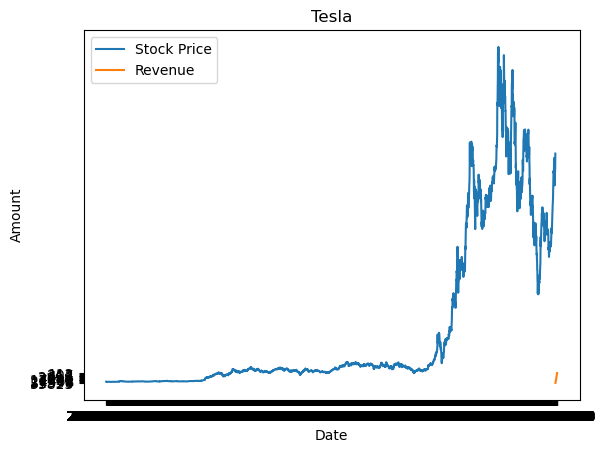

In [31]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Convert the Date column to string format
    stock_data['Date'] = stock_data['Date'].astype(str)
    revenue_data['Date'] = revenue_data['Date'].astype(str)

    # Plot the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')

    # Plot the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Amount')

    # Show the legend
    plt.legend()

    # Display the graph
    plt.show()

# Assuming you have the tesla_data and tesla_revenue DataFrames
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


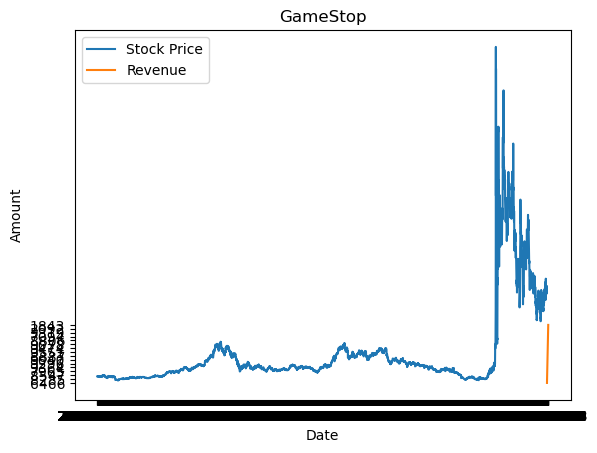

In [32]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Convert the Date column to string format
    stock_data['Date'] = stock_data['Date'].astype(str)
    revenue_data['Date'] = revenue_data['Date'].astype(str)

    # Plot the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')

    # Plot the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Amount')

    # Show the legend
    plt.legend()

    # Display the graph
    plt.show()

# Assuming you have the gme_data and gme_revenue DataFrames
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
